In [ ]:
# Clone the repository and install dependencies
!git clone https://github.com/lb-kosuke/Detection_Classification.git

In [ ]:
%cd Detection_Classification/

In [ ]:
!pip install ultralytics  # Required for YOLOv8

In [ ]:
# Import Modules
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Load Trained YOLOv8n Model
model = YOLO('./model/YOLOv8n_based_model.pt')

# test for evaluation
metrics = model.val(
    data="./data/data.yaml",
    split='test',
    iou=0.45,
    conf=0.6
)

# calculate evaluation metrics
concordance_rate = metrics.box.mr * 100  # Recall (Ntp / Ntp + Nfn)
map50 = metrics.box.map50 * 100          # mAP@0.5
map75 = metrics.box.map75 * 100          # mAP@0.75
map50_95 = metrics.box.map * 100         # mAP@0.5:0.95

# print evaluation results
print("--- Evaluation Results (Paper standard) ---")
print(f"Concordance Rate: {concordance_rate:.2f}%")
print(f"mAP@0.5:         {map50:.2f}%")
print(f"mAP@0.75:        {map75:.2f}%")
print(f"mAP@0.5:0.95:    {map50_95:.2f}%")


image 1/8 /content/Detection_Classification/data/images/1.png: 1024x1440 1 b, 46 cs, 79.5ms
image 2/8 /content/Detection_Classification/data/images/2.png: 1024x1440 15 bs, 82 cs, 18.8ms
image 3/8 /content/Detection_Classification/data/images/3.png: 1024x1440 47 as, 18.9ms
image 4/8 /content/Detection_Classification/data/images/4.png: 1024x1440 10 as, 76 bs, 3 cs, 18.9ms
image 5/8 /content/Detection_Classification/data/images/5.png: 1024x1440 9 as, 35 bs, 1 c, 18.8ms
image 6/8 /content/Detection_Classification/data/images/6.png: 1024x1440 45 as, 2 bs, 18.9ms
image 7/8 /content/Detection_Classification/data/images/7.png: 1024x1440 2 as, 40 bs, 2 cs, 18.8ms
image 8/8 /content/Detection_Classification/data/images/8.png: 1024x1440 1 b, 26 cs, 18.9ms
Speed: 5.8ms preprocess, 26.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1440)


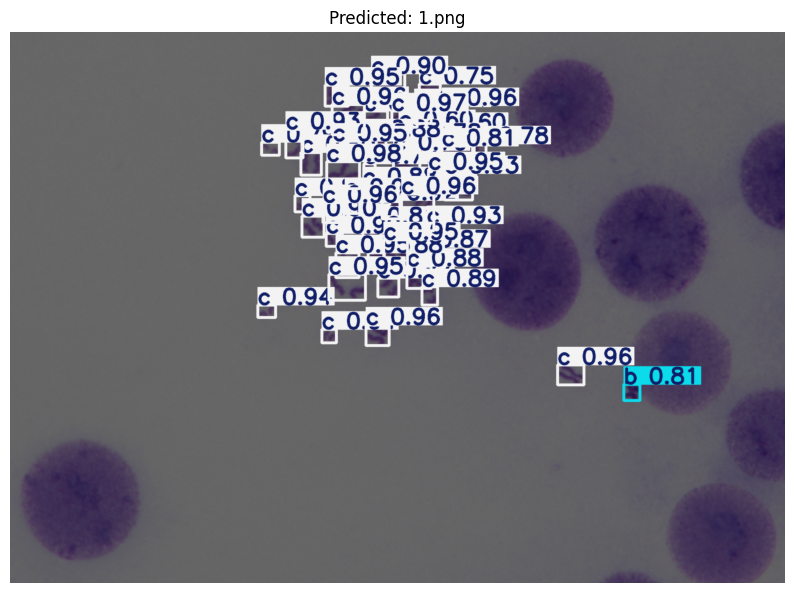

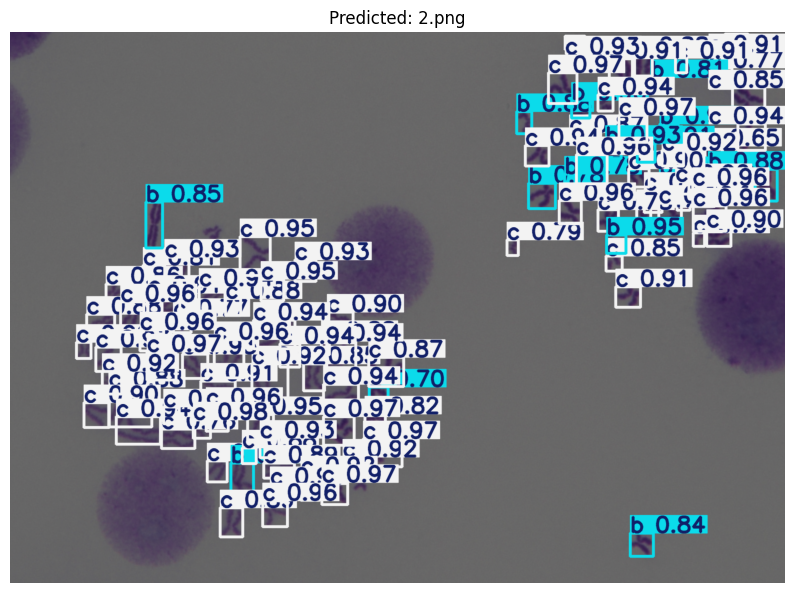

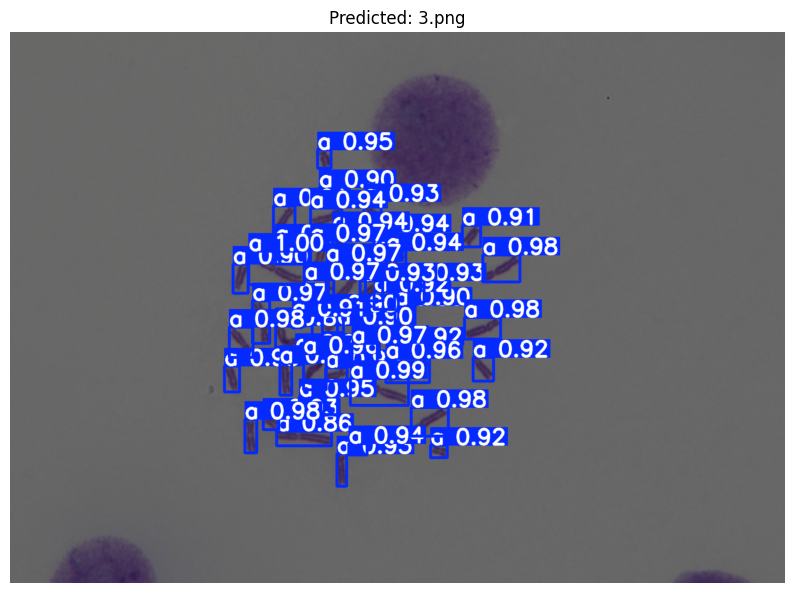

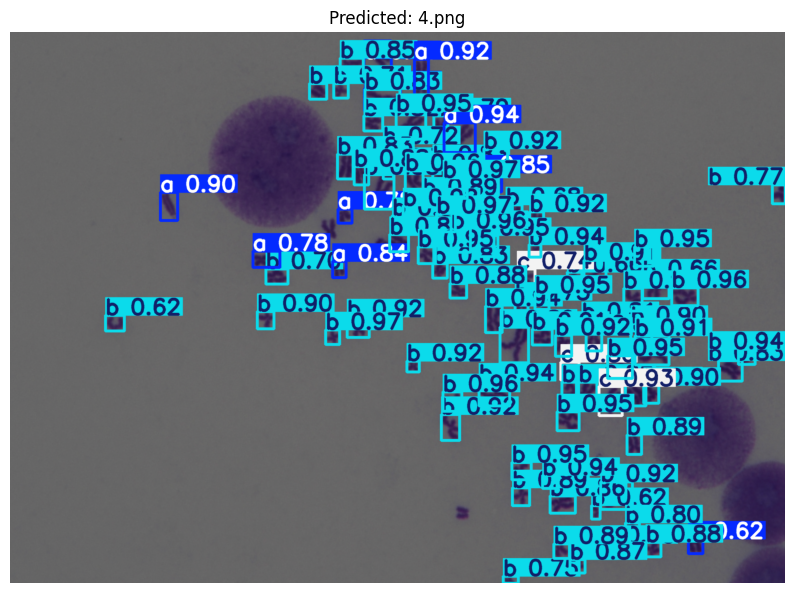

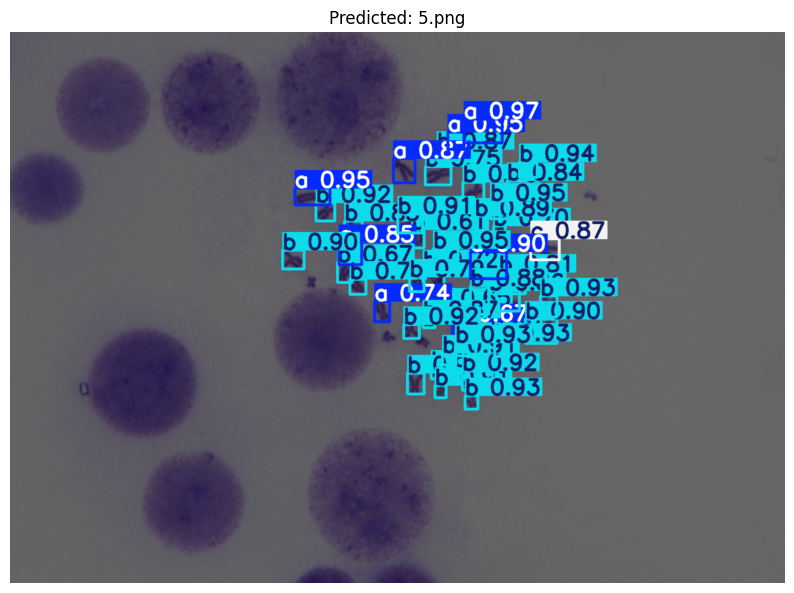

In [6]:
# Run Inference
results = model.predict(
    source="./data/images",
    iou=0.45,
    conf=0.6
)

# Display Predicted Images in Colab
for i, r in enumerate(results[:5]):
    im_bgr = r.plot()

    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.title(f"Predicted: {r.path.split('/')[-1]}")
    plt.axis('off')
    plt.show()